In [43]:
#EE219 Project 3
#Team:
#2/13/2018

In [29]:
#Problem 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#1st col is userid, 2nd col is movieid, 3rd col is rating, 4th col is timestamp
dataset = pd.read_csv('Data/ratings.csv')

X = dataset.iloc[:,:2].values

total_user = len(np.unique(X[:,0]))

total_movie = len(np.unique(X[:,1]))

available_ratings = len((X[:,1]))

possible_ratings = total_user*total_movie

print(available_ratings)
print(possible_ratings)

sparsity = (available_ratings+0.0)/ possible_ratings

print("Sparsity is:%f" %sparsity)


        userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
5            1     1263     2.0  1260759151
6            1     1287     2.0  1260759187
7            1     1293     2.0  1260759148
8            1     1339     3.5  1260759125
9            1     1343     2.0  1260759131
10           1     1371     2.5  1260759135
11           1     1405     1.0  1260759203
12           1     1953     4.0  1260759191
13           1     2105     4.0  1260759139
14           1     2150     3.0  1260759194
15           1     2193     2.0  1260759198
16           1     2294     2.0  1260759108
17           1     2455     2.5  1260759113
18           1     2968     1.0  1260759200
19           1     3671     3.0  1260759117
20           2       10     4.0   835355493
21           2       17     5.0 

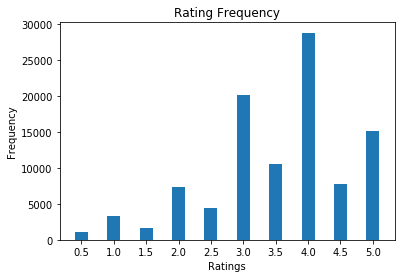

It can be concluded that most of ratings are in interval 3.0 - 5.0.
The rating with score 4 appears most frequent
The rating with score 0.5 appears least frequent


In [39]:
#Problem 2

ratings, counts = np.unique(X[:,2], return_counts=True)

x_values = ratings

y_values = counts

plt.bar(x_values,y_values,width = 0.2, tick_label=ratings)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Rating Frequency")
plt.show()
print("It can be concluded that most of ratings are in interval 3.0 - 5.0.")
print("The rating with score 4 appears most frequent.")
print("The rating with score 0.5 appears least frequent.")

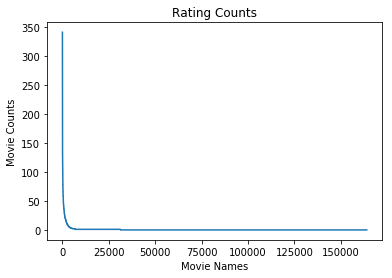

In [89]:
#Problem 3

movie_names,movie_counts = np.unique(X[:,1], return_counts=True)

movie_tuples = []
for i in range(0,len(movie_names)):
    movie_tuple = movie_names[i],movie_counts[i]
    movie_tuples.append(movie_tuple)
    

movie_tuples_sorted = sorted(movie_tuples,key = lambda movie_tuple: movie_tuple[1], reverse=True)

moive_names, movie_counts = zip(*movie_tuples_sorted)

plt.plot(movie_names,movie_counts)
plt.xlabel("Movie Names")
plt.ylabel("Movie Counts")
plt.title("Rating Counts")
plt.show()

#Problem 16

Yes. Equation 5 is a convex.

Let R' be a vector where contains all non-zero entry of rating matrix R with N * 1 where N is the number of non-zero entries in rating matrix R.

Let V' be a vector which contains [V11 ... Vnk] with the size nk*1.

Since U is fixed, U' can be factored as a vector which contains the coefficients of V' with size N*nk.

Then, the problem becomes min||R'-U'V'||^2 and this is a least square problem and R' and U' are known and V' is unknown.

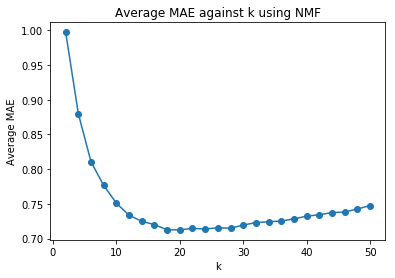

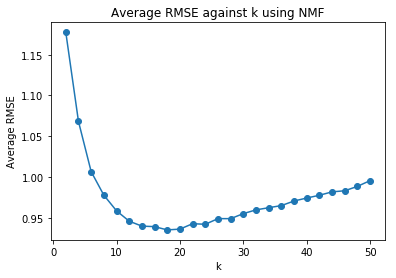

Minimum average MAE is 0.712406724893 optimal k is 20
Minimum average RMSE is 0.935021873173 optimal k is 18


In [97]:
# Problem 17
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.model_selection.validation import cross_validate
from surprise import Dataset

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader()

data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)


# number of latent factors
n_factors = np.arange(2, 52, 2)

# number of splits in corss validation
KFOLD = 10

avg_mae_scores = []
avg_rmse_scores = []
for k in n_factors:
    nmf =  NMF(n_factors=k, biased=False, random_state=42)
    results = cross_validate(nmf, data, measures=[u'rmse', u'mae'], cv=KFOLD)
    avg_mae_scores.append(np.average(results['test_mae']))
    avg_rmse_scores.append(np.average(results['test_rmse']))
    
plt.plot(n_factors, avg_mae_scores, '-o')
plt.xlabel("k")
plt.ylabel("Average MAE")
plt.title("Average MAE against k using NMF")
plt.show()

plt.plot(n_factors, avg_rmse_scores, '-o')
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('Average RMSE against k using NMF')
plt.show()

print('Minimum average MAE is', min(avg_mae_scores),
      'optimal k is', n_factors[avg_mae_scores.index(min(avg_mae_scores))])

print('Minimum average RMSE is', min(avg_rmse_scores),
      'optimal k is', n_factors[avg_rmse_scores.index(min(avg_rmse_scores))])


In [98]:
# Problem 18
optimal_k = 18
KFOLD = 10
nmf =  NMF(n_factors=optimal_k, biased=False, random_state=42)
results = cross_validate(nmf, data, measures=[u'rmse', u'mae'], cv=10)
print('When k = 20, minimum average MAE is ', np.average(results['test_mae']))
print('When k = 20, minimum average RMSE is ', np.average(results['test_rmse']))
print('The number of genres(including no genre) is 19. The optimal number of latent factors, 18, is close to the true number of generes.')


When k = 20, minimum average MAE is  0.713850751067
When k = 20, minimum average RMSE is  0.935598311477
The number of genres(including no genre) is 19. The optimal number of latent factors, 18, is close to the true number of generes.


Minimum average rmse is 0.676283784209


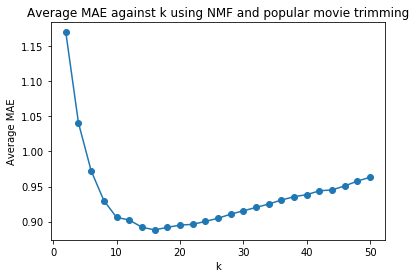

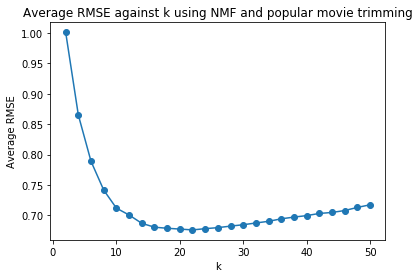

In [92]:
# Problem 19

from surprise.model_selection import KFold
from surprise import accuracy

def popular_movie_trimming(testset):
    movieId_count = {}
    for record in testset:
        if record[1] not in movieId_count.keys():
            movieId_count[record[1]] = 1
        else:
            movieId_count[record[1]] = movieId_count[record[1]] + 1
    testset[:] = [record for record in testset if movieId_count[record[1]] > 2]
    


# A reader is still needed but only the rating_scale param is requiered.
reader = Reader()

data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)


# number of latent factors
n_factors = np.arange(2, 52, 2)

avg_mae = []
avg_rmse = []

# define a cross-validation iterator
kf = KFold(n_splits=10, random_state=42)



for k in n_factors:
    algo = NMF(n_factors=k, biased=False, random_state=42)
    mae_list = []
    rmse_list = []

    for trainset, testset in kf.split(data):
        # train and test algorithm.
        algo.fit(trainset)
        popular_movie_trimming(testset)
        predictions = algo.test(testset)

        # Compute Root Mean Squared Error and MAE
        mae_list.append(accuracy.rmse(predictions, verbose=False))
        rmse_list.append(accuracy.mae(predictions, verbose=False))
    avg_mae.append(np.average(mae_list))
    avg_rmse.append(np.average(rmse_list))


print('Minimum average rmse is', min(avg_rmse))
plt.plot(n_factors, avg_mae, '-o')
plt.xlabel("k")
plt.ylabel("Average MAE")
plt.title("Average MAE against k using NMF and popular movie trimming")
plt.show()

plt.plot(n_factors, avg_rmse, '-o')
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('Average RMSE against k using NMF and popular movie trimming')
plt.show()


        

Minimum average rmse is 0.794827623088


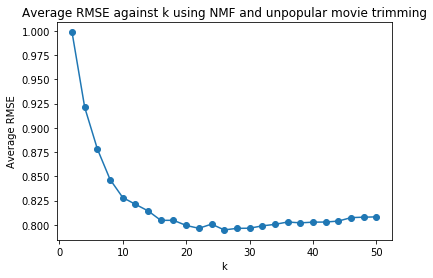

In [95]:
# Problem 20

def unpopular_movie_trimming(testset):
    movieId_count = {}
    for record in testset:
        if record[1] not in movieId_count.keys():
            movieId_count[record[1]] = 1
        else:
            movieId_count[record[1]] = movieId_count[record[1]] + 1
    testset[:] = [record for record in testset if movieId_count[record[1]] <= 2]
    
    
# number of latent factors
n_factors = np.arange(2, 52, 2)


avg_rmse = []

# define a cross-validation iterator
kf = KFold(n_splits=10, random_state=42)


for k in n_factors:
    algo = NMF(n_factors=k, biased=False, random_state=42)

    rmse_list = []

    for trainset, testset in kf.split(data):
        # train and test algorithm.
        algo.fit(trainset)
        unpopular_movie_trimming(testset)
        predictions = algo.test(testset)

        # Compute Root Mean Squared Error
        rmse_list.append(accuracy.mae(predictions, verbose=False))
    
    avg_rmse.append(np.average(rmse_list))

print('Minimum average rmse is', min(avg_rmse))

plt.plot(n_factors, avg_rmse, '-o')
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('Average RMSE against k using NMF and unpopular movie trimming')
plt.show()

Minimum average rmse is 0.686406804386


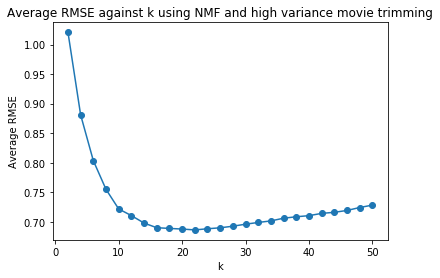

In [96]:
# Problem 21

def high_variance_movie_trimming(testset):
    movie_ratings = {}
    
    for record in testset:
        if record[1] not in movie_ratings.keys():
            movie_ratings[record[1]] = [record[2]]
        else:
            movie_ratings[record[1]].append(record[2])
            
    testset[:] = [record for record in testset
                  if len(movie_ratings[record[1]]) >= 5 or
                  np.var(movie_ratings[record[1]]) >= 2]

    
# number of latent factors
n_factors = np.arange(2, 52, 2)


avg_rmse = []

# define a cross-validation iterator
kf = KFold(n_splits=10, random_state=42)


for k in n_factors:
    algo = NMF(n_factors=k, biased=False, random_state=42)

    rmse_list = []

    for trainset, testset in kf.split(data):
        # train and test algorithm.
        algo.fit(trainset)
        high_variance_movie_trimming(testset)
        predictions = algo.test(testset)

        # Compute Root Mean Squared Error and MAE
        rmse_list.append(accuracy.mae(predictions, verbose=False))

    avg_rmse.append(np.average(rmse_list))

print('Minimum average rmse is', min(avg_rmse))

plt.plot(n_factors, avg_rmse, '-o')
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('Average RMSE against k using NMF and high variance movie trimming')
plt.show()

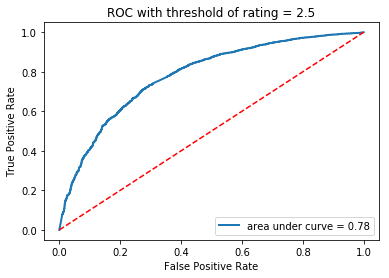

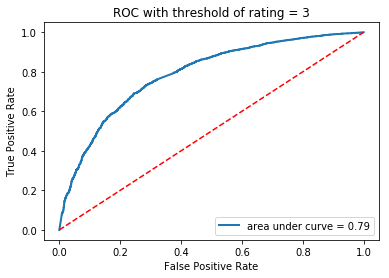

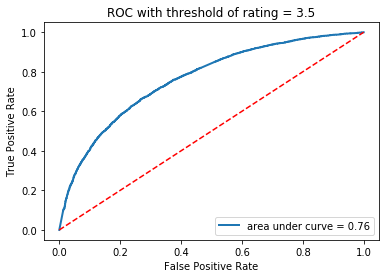

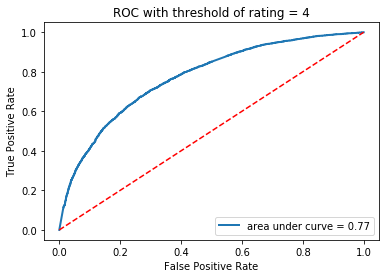

In [130]:
# Problem 22
from sklearn.metrics import roc_curve, auc
from surprise.model_selection import train_test_split
%matplotlib inline

thresholds = [2.5, 3, 3.5, 4]

algo = NMF(n_factors=k, biased=False, random_state=42)

trainset, testset = train_test_split(data, test_size=0.1, random_state=42)

algo.fit(trainset)

predictions = algo.test(testset)

predicted_labels = []
for prediction in predictions:
    predicted_labels.append(prediction.est)



for th in thresholds:
    testset_labels = []
    for record in testset:
        if record[2] >= th:
            label = 1
        else:
            label = 0
        testset_labels.append(label)
    fig, ax = plt.subplots()
    fpr, tpr, thresholds = roc_curve(testset_labels, predicted_labels)

    area_under_roc = auc(fpr,tpr)
    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.2f' % area_under_roc)
    ax.plot([0,1], [0,1], 'r--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC with threshold of rating = {}'.format(th))
    ax.legend(loc="lower right")

    



In [167]:
# Problem 23
algo = NMF(n_factors=20, biased=False, random_state=42)
trainset = data.build_full_trainset()

algo.fit(trainset)
movie_dataset = pd.read_csv('Data/movies.csv')
movieId_to_rowNum = {}
for i in range(movie_dataset.shape[0]):
    movieId_to_rowNum[movie_dataset['movieId'].iloc[i]] = i

i = 0
for col in algo.qi.T:
    top_10_iiids = np.argsort(col)[::-1][:10]
    print('Column', i)
    i = i+1
    for iiid in top_10_iiids:
        raw_id = trainset.to_raw_iid(iiid)
        print(movie_dataset.iloc[movieId_to_rowNum[raw_id]]['genres'])
    print('\n\n')





Column 0
Drama|Mystery|Romance
Action|Comedy|Crime|Fantasy
Comedy|Documentary
Drama|War
Children|Comedy
Action|Adventure|Sci-Fi|War|IMAX
Thriller
Comedy|Western
Action|Adventure|Sci-Fi|IMAX
Drama



Column 1
Comedy|Documentary
Adventure|Animation
Musical
Comedy|Romance
Drama|Fantasy|Horror
Comedy
Drama|Sci-Fi
Drama
Adventure|Drama|Sci-Fi
Drama|Romance



Column 2
Adventure|Drama|Fantasy|Romance
Action|Adventure|Drama|Thriller
Action|War
Action|Crime|Thriller
Comedy
Comedy|Drama|Romance
Comedy
Comedy|Mystery|Thriller
Drama
Comedy



Column 3
Drama
Comedy|Crime
Comedy|Drama
Documentary|Drama
Action
Drama|Thriller
Adventure|Children
Drama|Romance
Comedy
Drama



Column 4
Comedy|Crime|Mystery|Thriller
Action|Comedy
Documentary
Action|Adventure|Sci-Fi|Thriller
Comedy|Drama
Drama|Romance
Children|Comedy|Musical|Romance
Comedy
Documentary
Comedy|Romance



Column 5
Action|Crime|Drama|Mystery|Thriller
Comedy|Crime|Drama
Horror
Action|Sci-Fi|Thriller|IMAX
Horror|Sci-Fi
Comedy|Drama
Action|Adven